In [1]:
from scipy import stats

In [2]:
from matplotlib import pyplot as plt
import plotly
import seaborn as sns
%matplotlib inline

In [3]:
%reload_ext nb_black
import pandas as pd
import numpy as np

<IPython.core.display.Javascript object>

For this assignment, you'll use a real-life dataset of housing prices, as published in the Journal of Applied Econometrics. Download the data here.

Explore the following questions. Include a hypothesis, test assumptions, and provide valid findings from the data.

    Do homes with air conditioning have a higher sales price than homes without air conditioning?
    Do homes with a full basement have a higher sales price than homes without a full basement?

As you are conducting the analysis, consider what other variables may be accounting for any significant differences that you find. 

In [6]:
url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/homeprices.applied.econ.csv"
df = pd.read_csv(url)

<IPython.core.display.Javascript object>

In [10]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no


<IPython.core.display.Javascript object>

# Do homes with air conditioning have a higher sales price than homes without air conditioning?

In [14]:
no_ac = df[df.airco == "no"]
yes_ac = df[df.airco == "yes"]
no_ac.info()
yes_ac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     373 non-null    float64
 1   lotsize   373 non-null    int64  
 2   bedrooms  373 non-null    int64  
 3   bathrms   373 non-null    int64  
 4   stories   373 non-null    int64  
 5   driveway  373 non-null    object 
 6   recroom   373 non-null    object 
 7   fullbase  373 non-null    object 
 8   gashw     373 non-null    object 
 9   airco     373 non-null    object 
 10  garagepl  373 non-null    int64  
 11  prefarea  373 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 37.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 373 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     173 non-null    float64
 1   lotsize   173 non-null    int64  
 2   bedrooms  173 non-

<IPython.core.display.Javascript object>

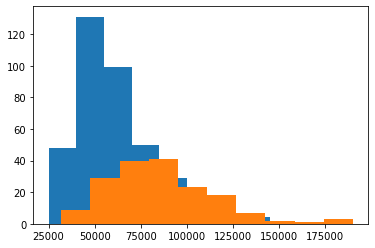

<IPython.core.display.Javascript object>

In [15]:
plt.hist(no_ac.price)
plt.hist(yes_ac.price)
plt.show()

In [16]:
print(stats.describe(yes_ac.price))
print(stats.describe(no_ac.price))

DescribeResult(nobs=173, minmax=(31900.0, 190000.0), mean=85880.58959537573, variance=810167352.2317516, skewness=0.8558523643779228, kurtosis=0.9609338749117713)
DescribeResult(nobs=373, minmax=(25000.0, 175000.0), mean=59884.85254691689, variance=455341800.98626363, skewness=1.4196100209360347, kurtosis=3.448225770991252)


<IPython.core.display.Javascript object>

# Do homes with a full basement have a higher sales price than homes without a full basement?

In [17]:
yes_fb = df[df.fullbase == "yes"]
no_fb = df[df.fullbase == "no"]

<IPython.core.display.Javascript object>

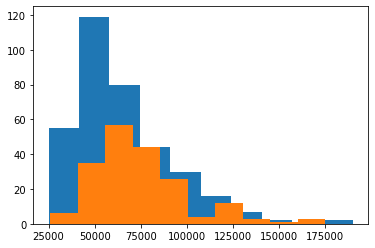

DescribeResult(nobs=191, minmax=(26000.0, 175000.0), mean=74894.50261780104, variance=687483535.4092036, skewness=1.299439350765169, kurtosis=2.200944427832982)
DescribeResult(nobs=355, minmax=(25000.0, 190000.0), mean=64477.58309859155, variance=690693014.1816344, skewness=1.2539001276811907, kurtosis=1.9898502593432044)


<IPython.core.display.Javascript object>

In [18]:
plt.hist(no_fb.price)
plt.hist(yes_fb.price)
plt.show()

print(stats.describe(yes_fb.price))
print(stats.describe(no_fb.price))

In [20]:
t1, p1 = stats.ttest_ind(yes_fb.price, no_fb.price)


<IPython.core.display.Javascript object>

In [21]:
p1

1.1885626562866786e-05

<IPython.core.display.Javascript object>

There is a significant difference in pricing for house with and without fullbasements.